In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [2]:
data_full=pd.read_csv("https://covid.ourworldindata.org/data/full_data.csv")
data_full.head()

,date,location,new_cases,new_deaths,total_cases,total_deaths
0,2020-02-25,Afghanistan,NaN,NaN,1,NaN
1,2020-02-26,Afghanistan,0.0,NaN,1,NaN
2,2020-02-27,Afghanistan,0.0,NaN,1,NaN
3,2020-02-28,Afghanistan,0.0,NaN,1,NaN
4,2020-02-29,Afghanistan,0.0,NaN,1,NaN


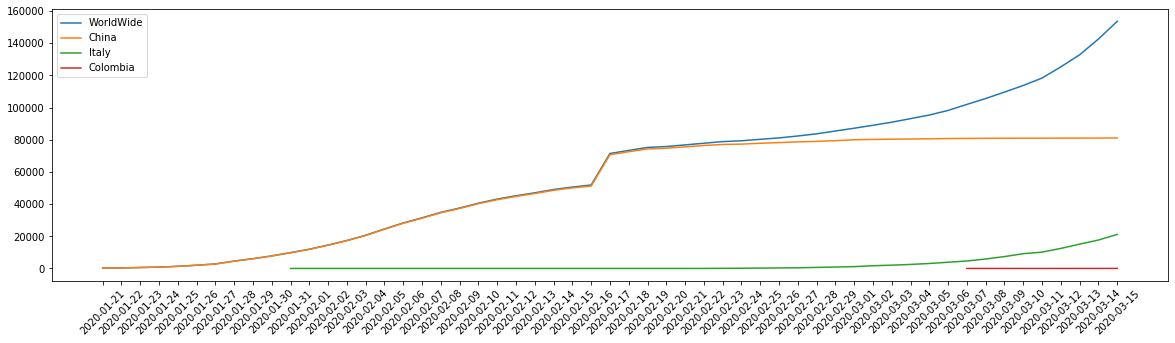

In [3]:
isworldwide=data_full["location"]=="World"
ischina=data_full["location"]=="China"
iscolombia=data_full["location"]=="Colombia"
isitaly=data_full["location"]=="Italy"
plt.figure(figsize=(20,5))
plt.plot(data_full["date"][isworldwide],data_full["total_cases"][isworldwide],label="WorldWide")
plt.plot(data_full["date"][ischina],data_full["total_cases"][ischina],label="China")
plt.plot(data_full["date"][isitaly],data_full["total_cases"][isitaly],label="Italy")
plt.plot(data_full["date"][iscolombia],data_full["total_cases"][iscolombia],label="Colombia")
plt.xticks(rotation=45)
#plt.yscale("log")
plt.legend()
plt.show()

In [4]:
np.unique(data_full["location"])

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Belarus',
       'Belgium', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Cambodia', 'Cameroon',
       'Canada', 'Cayman Islands', 'Central African Republic', 'Chile',
       'China', 'Colombia', 'Congo', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czech Republic',
       'Democratic Republic of Congo', 'Denmark', 'Dominican Republic',
       'Ecuador', 'Egypt', 'Equatorial Guinea', 'Estonia', 'Ethiopia',
       'Faeroe Islands', 'Finland', 'France', 'French Guiana',
       'French Polynesia', 'Gabon', 'Georgia', 'Germany', 'Ghana',
       'Gibraltar', 'Greece', 'Guadeloupe', 'Guernsey', 'Guinea',
       'Guyana', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'International', 'Iran', 'Iraq', 'Ireland'

/usr/local/lib/python3.7/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.7/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


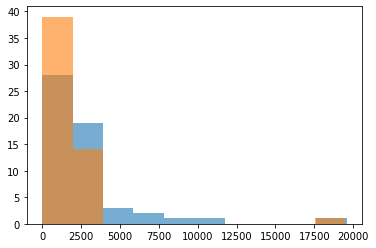

In [5]:
plt.hist(data_full["new_cases"][isworldwide],histtype='stepfilled',alpha=0.6)
plt.hist(data_full["new_cases"][ischina],histtype='stepfilled',alpha=0.6)
plt.show()

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [7]:
model = LogisticRegression(solver='liblinear', random_state=0)

In [8]:
dates_world=np.arange(0,len(data_full[isworldwide]),1)
dates_world

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54])

In [9]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
model = LogisticRegression(solver='newton-cg', random_state=0).fit(dates_world.reshape(-1,1), np.array(data_full[isworldwide]["total_cases"]))

In [11]:
model.classes_

array([   282,    314,    581,    846,   1320,   2014,   2798,   4593,
         6065,   7818,   9826,  11953,  14557,  17391,  20630,  24544,
        28276,  31481,  34886,  37558,  40554,  43103,  45171,  46997,
        49053,  50580,  51857,  71429,  73332,  75204,  75748,  76769,
        77794,  78811,  79331,  80239,  81109,  82294,  83652,  85403,
        87137,  88948,  90869,  93090,  95324,  98192, 101927, 105592,
       109577, 113702, 118319, 125260, 132758, 142539, 153523])

In [12]:
model.intercept_

array([ 21.69924528,  21.29107651,  20.8802447 ,  20.4671087 ,
        20.04886747,  19.62263152,  19.18604511,  18.73717162,
        18.27454676,  17.79722077,  17.30445631,  16.79560144,
        16.27009182,  15.72736908,  15.1670782 ,  14.58880081,
        13.99190167,  13.37573693,  12.73998203,  12.08341873,
        11.40563025,  10.70563902,   9.98248788,   9.23513403,
         8.46239721,   7.66291859,   6.83551206,   5.97867404,
         5.09047371,   4.16905972,   3.21236986,   2.21793624,
         1.18314954,   0.10501047,  -1.02012255,  -2.19618172,
        -3.42736952,  -4.71879401,  -6.07678531,  -7.50865408,
        -9.02271351, -10.62890569, -12.33952814, -14.16979912,
       -16.13871568, -18.27073279, -20.59846036, -23.16669762,
       -26.03889116, -29.30831996, -33.11840097, -37.70159523,
       -43.45986045, -51.14222901, -62.24223117])

In [13]:
model.coef_

array([[-1.55452378e+00],
       [-1.34138309e+00],
       [-1.19149595e+00],
       [-1.07720076e+00],
       [-9.84577382e-01],
       [-9.06125543e-01],
       [-8.37497504e-01],
       [-7.75993934e-01],
       [-7.19858072e-01],
       [-6.67907972e-01],
       [-6.19304115e-01],
       [-5.73427166e-01],
       [-5.29807297e-01],
       [-4.88077293e-01],
       [-4.47956457e-01],
       [-4.09212971e-01],
       [-3.71643790e-01],
       [-3.35079320e-01],
       [-2.99392803e-01],
       [-2.64432846e-01],
       [-2.30107153e-01],
       [-1.96310809e-01],
       [-1.62952932e-01],
       [-1.29950711e-01],
       [-9.72255342e-02],
       [-6.47008979e-02],
       [-3.23150053e-02],
       [-9.57389735e-07],
       [ 3.23162094e-02],
       [ 6.47014106e-02],
       [ 9.72204301e-02],
       [ 1.29946136e-01],
       [ 1.62949193e-01],
       [ 1.96306215e-01],
       [ 2.30106261e-01],
       [ 2.64439381e-01],
       [ 2.99396568e-01],
       [ 3.35086478e-01],
       [ 3.7

In [14]:
model.predict_proba(dates_world.reshape(-1,1))

array([[3.41280392e-01, 2.26905955e-01, 1.50460988e-01, ...,
        1.71739928e-29, 7.91518378e-33, 1.19616561e-37],
       [2.50650832e-01, 2.06238400e-01, 1.58870296e-01, ...,
        1.96519365e-28, 1.05216626e-31, 1.96774497e-36],
       [1.71120067e-01, 1.74247736e-01, 1.55932082e-01, ...,
        2.09032303e-27, 1.30011483e-30, 3.00898681e-35],
       ...,
       [3.00055764e-35, 1.29825309e-30, 2.08874612e-27, ...,
        1.55929240e-01, 1.74245026e-01, 1.71121878e-01],
       [1.96216996e-36, 1.05065429e-31, 1.96372779e-28, ...,
        1.58868747e-01, 2.06234154e-01, 2.50645476e-01],
       [1.19275075e-37, 7.90385087e-33, 1.71615040e-29, ...,
        1.50462339e-01, 2.26902468e-01, 3.41265693e-01]])

In [15]:
model.predict(dates_world.reshape(-1,1))

array([   282,    282,    314,    581,    846,   1320,   2014,   2798,
         4593,   6065,   7818,   9826,  11953,  14557,  20630,  24544,
        28276,  31481,  34886,  37558,  40554,  43103,  45171,  46997,
        49053,  50580,  51857,  71429,  73332,  75204,  75748,  76769,
        77794,  78811,  79331,  80239,  81109,  82294,  83652,  85403,
        87137,  90869,  93090,  95324,  98192, 101927, 105592, 109577,
       113702, 118319, 125260, 132758, 142539, 153523, 153523])

In [16]:
model.score(dates_world.reshape(-1,1), np.array(data_full[isworldwide]["total_cases"]))

0.5272727272727272

## The model
We try to fit model of grows by mean of a logistic equation plus a relaxion term:

$f=\frac{a}{1+e^{-bt+c}}+(1+e^{-dt+e})$

In the case of colombia..

In [17]:
from scipy.optimize import curve_fit
def growth(t,a,b,c,d,e):
    return (a/(1+np.exp(-b*t+c)))#+(1+np.exp(-d*t+e))

In [18]:
popt, pcov = curve_fit(growth, np.arange(0,len(data_full["total_cases"][iscolombia]),1), np.array(data_full["total_cases"][iscolombia]))

/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [19]:
popt

array([193.18668008,   0.461009  ,   5.6424078 ,   1.        ,
         1.        ])

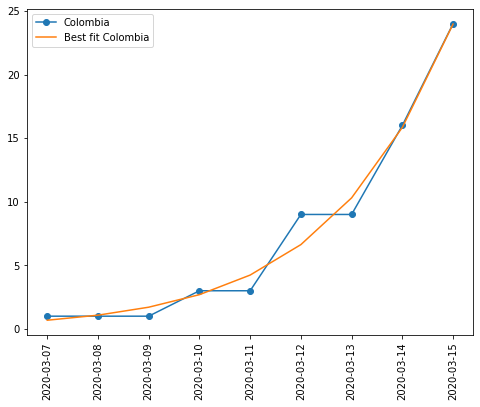

In [20]:
plt.figure(figsize=(8,6))
plt.plot(data_full["date"][iscolombia],data_full["total_cases"][iscolombia],label="Colombia",marker=".",markersize=12)
plt.plot(np.arange(0,len(data_full["total_cases"][iscolombia]),1), growth(np.arange(0,len(data_full["total_cases"][iscolombia]),1), *popt),label="Best fit Colombia")
plt.legend()
plt.xticks(rotation=90)
plt.show()

Estimation for future days.

In [21]:
rng = pd.date_range(data_full["date"][iscolombia].iloc[0], periods=25, freq='D')
df = pd.DataFrame({ 'Date': rng, 'Val': growth(np.arange(0,len(rng),1), *popt) }) 
#df

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


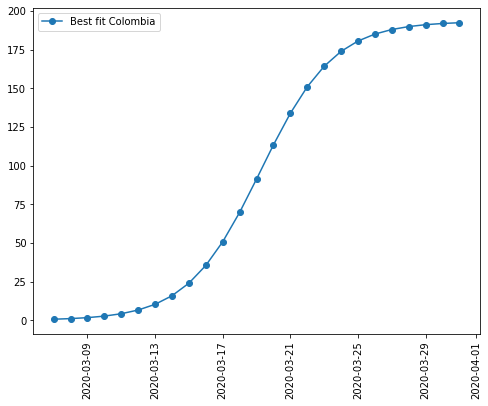

In [22]:
plt.figure(figsize=(8,6))
#plt.plot(data_full["date"][iscolombia],data_full["total_cases"][iscolombia],label="Colombia",marker=".",markersize=12)
plt.plot(df["Date"], df["Val"],label="Best fit Colombia",marker=".",markersize=12)
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [23]:
df

,Date,Val
0,2020-03-07,0.682298
1,2020-03-08,1.079668
2,2020-03-09,1.706415
3,2020-03-10,2.691891
4,2020-03-11,4.233907
5,2020-03-12,6.628512
6,2020-03-13,10.303599
7,2020-03-14,15.843247
8,2020-03-15,23.970865
9,2020-03-16,35.434865
